# Fourier

In [1]:
require(ggplot2)

Loading required package: ggplot2


# Spiegazione delle unita' dell'analisi di Fourier
in questo esempio prendo le funzioni piu' "semplici" per studiare l'analisi di fourier, ergo i seni.
Considera che questa e' una analisi fatta su un intervallo di lunghezza L (quidi va da 0 a L).

La funzione fft() calcola le componenti della trasformata di Fourier, che sono valori complessi.
A noi di solito interessa l'ampiezza di questi valori, e quindi ne calcolioamo il modulo tramite la funzione:
* coeffFourier <- fft(mioArray)
* Mod()    occhio alla M maiuscola

La funzione fft() prende dei punti come ingresso.
La lunghezza totale della dell'intervallo su cui viene definita la funzione e' il NUMERO totale di punti
(per esempio se gli passo un array di 12000 punti la lunghezza totale e' 12000). I punti sono pensati equispaziati.

Ricorda che k e' il numero di cicli corrispondente al particolare elemento del sonc definito dalle onde piane.

Ognuna di queste onde piane e' pensata fare un determinato numero di cicli all'interno dell'intervallo, e quindi k definisce esattamente questo numero di cicli. Una funzione che fa un solo ciclo (k=1) ha una lunghezza d'onda N (numero di punti). Una funzione che fa 3 cicli ha una lunghezza d'onda N/3.

Se conosco la lunghezza d'onda $\lambda_k$ dell'elemento del sonc e voglio trovare a quale k corrisponde basta che faccio la divisione tra N (lunghezza totale) / $\lambda_k$ (lunghezza d'onda dello stato cercato).
Questo ci fornisce il numero di cicli che fa la funzione, ovvero k.
Nel dettaglio se $\lambda_k= 24$ e $N= 7200$, k=7200/24=300.

Se ho un array contentente  le ampiezze, devo andare a cercare quindi il 300mo elemento.
Se voglio che questo sia alla posizione 1 deveo dividere le posizioni proprio per 300!



Quindi se voglio sapere a che k corrisponde un'onda di lunghezza 50 devo fare
12000/50 (numero totale di cicli nell'intervallo considerato)

In generale quindi la lunghezza della funzione e' il numero di punti N,
e il la lunghezza d'onda cercata ha n punti, allora il momento
associato a quella lunghezza d'onda e':

$k=\frac{N}{n}$

In questo caso ho costruito delle funzioni in questo modo.
Ho una lunghezza L e la ho divisa in N punti. Ho una funzione che viene definita quindi
$f:[0,L]->R$

* k = 1 corrisponde a seni che compiono cicli di lunghezza L
* k = 2 corrisponde a seni che compiono cicli di lunghezza L/2
* k = 3 corrisponde a seni che compiono cicli di lunghezza L/3
* ....
* k = N/2                                        lunghezza N/(L/2)

Se costruisco una funzione del tipo $\sin(\frac{2\pi}{L}x)$, questa funzione fa un ciclo lungo L,
e quindi corrisponde a k=1.

La funzione $\sin(9\frac{2\pi}{L}x)$  fa cicli lunghi L/9 e quindi l'ampiezza che la descrive e' data da k=9


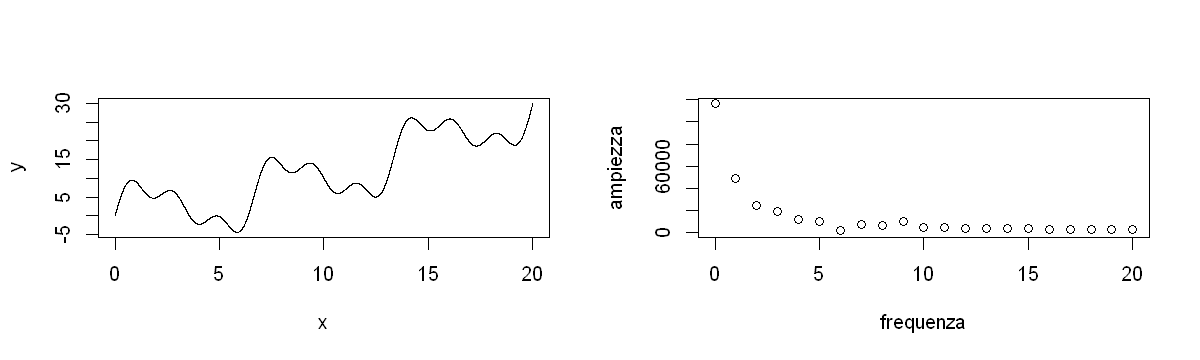

In [3]:
#x[1:10]
###
#  nota che i punti della funzione sono ogni n * 2pi/L x, con x = L/1000, 2L/1000, 3L/1000
#  x= L/2000, 2L/2000,...,NL/2000  (dove N e' il numero di punti).
#  ########   2 pi/L    e'  1 ciclo #########
#  i seni che ho preso fanno 1,2,3, ... k, giri entro l'intervallo L, 
#  nota inoltre che io non passo i valori di x alla funzione fft()
#  In questo modo i k delle fondamentali della fft sono interi ed equivalenti al numero di giri fatti
#  se ho una serie temporale in valori 1,2,3,4,...,N
#
###

par(mfrow = c(1, 2))            # questo per visualizzare 1 riga 2 colonne 
options(repr.plot.width=10, repr.plot.height=3) # larghezza canvas immagine 12inch altezza 6 <======================

L        <- 20
N        <- 10000
x <- seq (0, L, length= N) # length.out = length
y1 <- sin(3*(2*pi/L)*x)  #+ sin((2*pi/L)*x)
y2 <- sin(6*(2*pi/L)*x)
y3 <- sin(9*(2*pi/L)*x) 
#y=y1+0.5*x+0.05*x**2
err <- rnorm(200)
err <- err /5
y <- 7.0*y1+2.0*y2+3.0*y3 + 0.5*x +0.05*x**2 #+err
#plot(x,y1, type='l',col='blue', ylim=c(-2,2))
#lines(x,y2, type='l')
plot(x,y, type='l')
fourier    <- fft(y)
am         <- Mod(fourier)    # ampiezza (complessa) delle frequenza, ne faccio il modulo
#am
freqVector <- 0:(length(am)-1)
df         <- data.frame(frequenza=freqVector, ampiezza=am)
#plot(df, xlim=c(0,length(freqVector)), type='p')
plot(df, xlim=c(0,20), type='p')

Nel caso sotto si ha il seguente scenario. Una funzione f: [0:N]->R (dove posso decidere quanto sia grande N).
Ogni punto corrisponde ad 1 ora, e quindi 24 punti sono un giorno.
Quando faccio la fft() ottengo i valori associati a vari k. Per esempio k=1 implica 1 ciclo (di lunghezza N), k=30 sono 30 cicli (di lunghezza N/30).

All'interno di questo intervallo a che k corrisponde una lunghezza d'onda associata a 24?
Devo semplicemente trovare quanti cili ci sono in N punti. Dato che ogni ciclo sono 24: N/24.
Mi aspetto quindi che la trasformata di Fourier abbia un picco per k = N/24.
Se voglio che sull'asse delle ascisse della fft questo corrisponda ad 1 devo semplicemente prendere
gli N punti e dividerli per N/24.


k e' un numero legato al numero di cicli, e viene messo in ordine come risultato della fft:
* k=1    1 ciclo, l'onda associata ha una lunghezza L   (N)
* k=2    2 cicli, l'onda associata ha una lunghezza L/2 (N/2)
* k=3    3 cicli, l'onda associata ha una lunghezza L/3 (N/3)
...
* k=?    ? cicli, ma conosco che l'onda associata e' lunga 24, quindi ci sono N/24 cicli!!!   
Nel caso del secondo esempio qui sotto la lunghezza totale dell'intervallo e' uguale al numero di punti N.

Noi vogliamo sapere a quale k corrispondono le funzioni che hanno dei cicli di 24 ore 
(periodo do una giornata per vedere se a quel k c'e' un picco).

Ricordandoci che N e' la lunghezza di 1 ciclo, allora il numero di cicli associati ad una lunghezza 24 e' N/24. 

Quindi il k=N/24 e' quello associato ad un giorno.

A questo punto se voglio che quel k sia uguale a 1 (giorno) basta che prendo i punti e li divido per N/24, e quel k deve avere una ampiezza elevata.


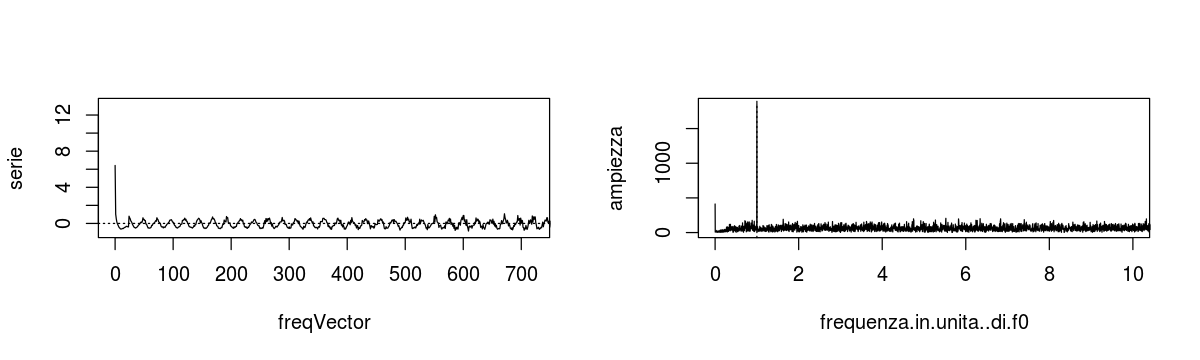

In [17]:
par(mfrow = c(1, 2)) 
options(repr.plot.width=10, repr.plot.height=3) 
diff <-read.table('fort.45') #  leggo il file dei dati
intervallo=7200
f0=24                              # grandezza di un ciclo
fondamentale = intervallo/f0       # numero di cicli nell'intervallo considerato
#serie <- (diff$V3/diff$V4)
#serie <- serie[24:7200]
serie <- (diff$V3- diff$V4)/diff$V4
serie <- serie [1:intervallo]
fourier <- fft(serie)
am <- Mod(fourier)
freqVector <- 0:(length(am)-1)
df <- data.frame("frequenza in unita' di f0"= freqVector/fondamentale  , ampiezza=am)  # divido per la fondamentale
plot(freqVector, serie, type='l', xlim=c(0,intervallo/10)); abline(h=0, lty=3)
plot(df, xlim=c(0,10),type ='l'); abline(v=1, lty=3)
